In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('SalaryData_Test.csv')

## Step 1: Exploratory Data Analysis

In [4]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
# We have two columns of education, let us delete one

data.drop('educationno', axis = 1, inplace = True)

In [6]:
data.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   maritalstatus  15060 non-null  object
 4   occupation     15060 non-null  object
 5   relationship   15060 non-null  object
 6   race           15060 non-null  object
 7   sex            15060 non-null  object
 8   capitalgain    15060 non-null  int64 
 9   capitalloss    15060 non-null  int64 
 10  hoursperweek   15060 non-null  int64 
 11  native         15060 non-null  object
 12  Salary         15060 non-null  object
dtypes: int64(4), object(9)
memory usage: 1.5+ MB


In [8]:
# Let us check for missing values

data.isna().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
data[data.duplicated(keep = 'first')]

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [10]:
# Let us drop duplicate values

data.drop_duplicates(keep = 'first', inplace = True)
data = data.reset_index(drop = True)

In [11]:
data.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [12]:
# Let us again check for duplicates

data[data.duplicated()]

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [13]:
# Let us check types of variables

numerical_data = [col for col in data.columns if data[col].dtypes != 'O']
categorical_data = [col for col in data.columns if col not in numerical_data]
print('Total number of numerical columns are,', len(numerical_data))
print('Total number of categorical columns are,', len(categorical_data))

Total number of numerical columns are, 4
Total number of categorical columns are, 9


In [14]:
# Let us check sub-types of numerical data

discrete_data = [col for col in numerical_data if len(data[col].unique()) < 25]
continuous_data = [col for col in numerical_data if col not in discrete_data]
print('Total number of discrete data columns in numerical data columns are, ', len(discrete_data))
print('Total number of continuous data columns in numerical data columns are,', len(continuous_data))

Total number of discrete data columns in numerical data columns are,  0
Total number of continuous data columns in numerical data columns are, 4


In [15]:
# Let us check total number of labels in categorical data

for col in categorical_data:
    print(f"'{col}' columns has {len(data[col].unique())} labels")

'workclass' columns has 7 labels
'education' columns has 16 labels
'maritalstatus' columns has 7 labels
'occupation' columns has 14 labels
'relationship' columns has 6 labels
'race' columns has 5 labels
'sex' columns has 2 labels
'native' columns has 40 labels
'Salary' columns has 2 labels


In [16]:
# Let us check frequency of high cardinality columns

for col in categorical_data:
    if len(data[col].unique()) > 10:
        freq = data[col].value_counts() /len(data[col])
        print(freq)        

education
HS-grad         0.316561
Some-college    0.213305
Bachelors       0.167657
Masters         0.061146
Assoc-voc       0.044869
11th            0.038358
Assoc-acdm      0.034890
10th            0.027955
7th-8th         0.018754
Prof-school     0.017056
9th             0.015499
12th            0.013730
Doctorate       0.011890
5th-6th         0.011394
1st-4th         0.005025
Preschool       0.001911
Name: count, dtype: float64
occupation
Prof-specialty       0.134395
Exec-managerial      0.134253
Craft-repair         0.122364
Sales                0.121373
Adm-clerical         0.120524
Other-service        0.107077
Machine-op-inspct    0.064614
Transport-moving     0.050248
Handlers-cleaners    0.045860
Tech-support         0.035315
Farming-fishing      0.034253
Protective-serv      0.023071
Priv-house-serv      0.006299
Armed-Forces         0.000354
Name: count, dtype: float64
native
United-States                 0.910050
Mexico                        0.020665
Philippines       

### Conclusion

1. The given dataset has some high cardinality columns.
2. Some of the value frequencies in high cardinality columns is very low i.e. values are occuring very less.
3. There might be a chance of long tail distribution

## Data Visualization


### Univariate Plots

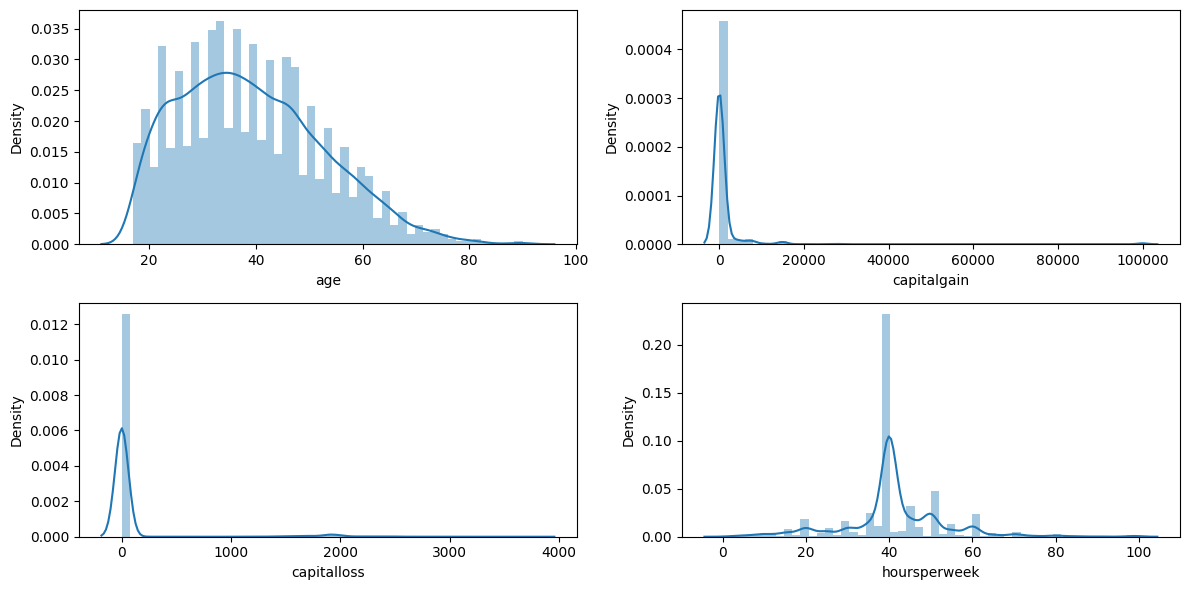

In [17]:
# Let us look at distribution of numerical data

plt.figure(figsize = (12, 6))
for i, col in enumerate(numerical_data, 1):
    plt.subplot(2, 2, i)
    sns.distplot(data[col])
plt.tight_layout()    

We can see the distribution has heavy tails, meaning, there might be outliers or large extreme values present in the each data columns. Also, the columns above are not symmeterical.

In [18]:
# Let us check skewness and Kurtosis value for each numerical columns.

for col in numerical_data:
    print(f"Skewness value for {col} column is {round(data[col].skew(), 4)} and Kurtosis value is {round(data[col].kurt(), 4)}")

Skewness value for age column is 0.5214 and Kurtosis value is -0.198
Skewness value for capitalgain column is 11.2556 and Kurtosis value is 135.9089
Skewness value for capitalloss column is 4.3466 and Kurtosis value is 17.711
Skewness value for hoursperweek column is 0.3641 and Kurtosis value is 3.125


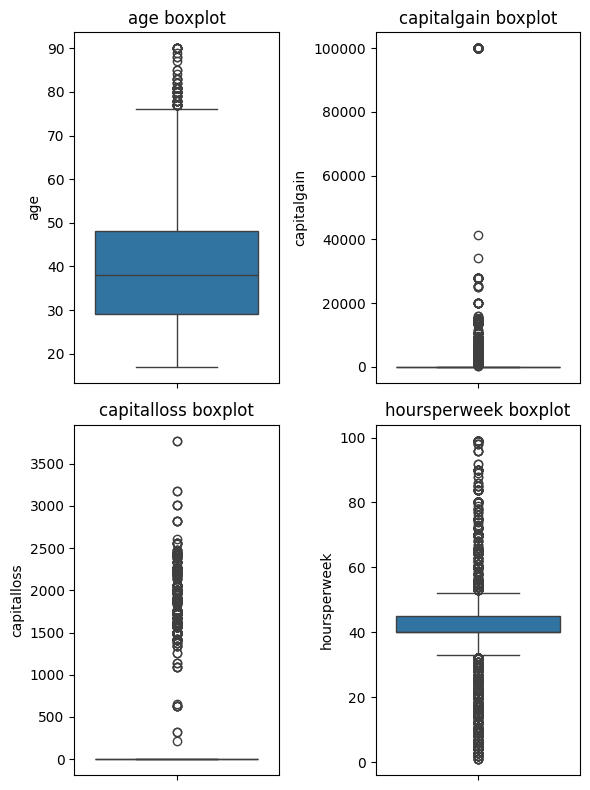

In [19]:
# Let us check for outliers in the dataset using boxplot

plt.figure(figsize = (6, 8))
for i, col in enumerate(numerical_data, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[col])
    plt.title(f'{col} boxplot')
    
plt.tight_layout() 


From boxplot, we can see that there are outliers in the distribution

In [20]:
# let us check number of outliers in each columns

outlier_data = []
outliers_index = []

for col in numerical_data:
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outlier_data = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
    outliers_index.append(outlier_data)
    print(f"{round(len(outlier_data) / len(data[col]) * 100, 2)} % of data in {col} column are outliers")
 
# unpacking the outliers list index
age_outliers, capitalGain_outliers, capitalLoss_outliers, hoursperweek_outliers = outliers_index    

0.59 % of data in age column are outliers
8.84 % of data in capitalgain column are outliers
5.02 % of data in capitalloss column are outliers
26.96 % of data in hoursperweek column are outliers


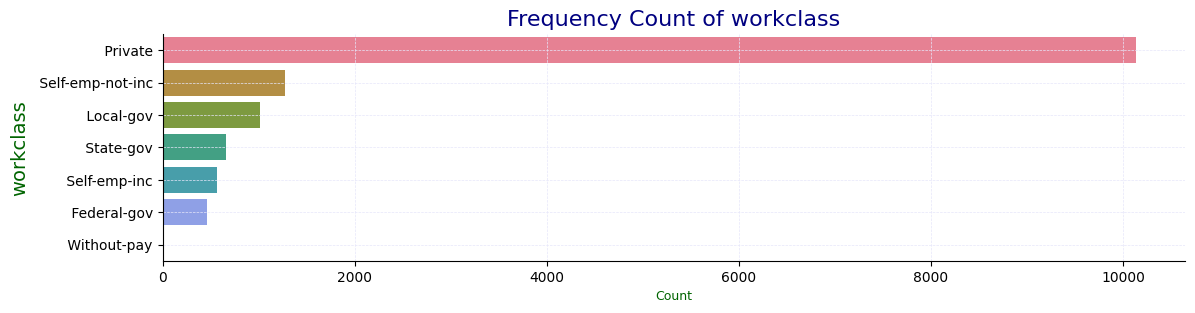

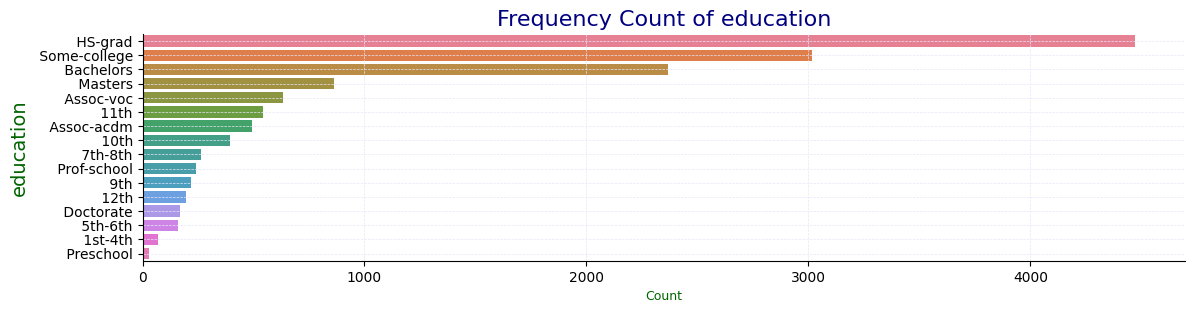

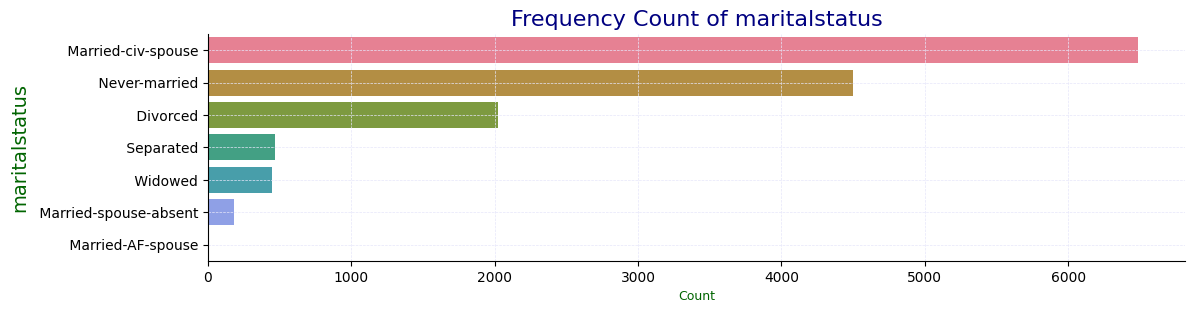

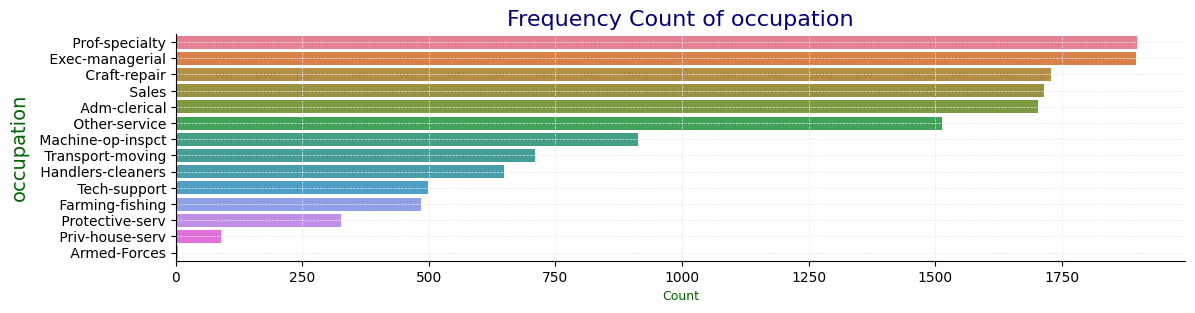

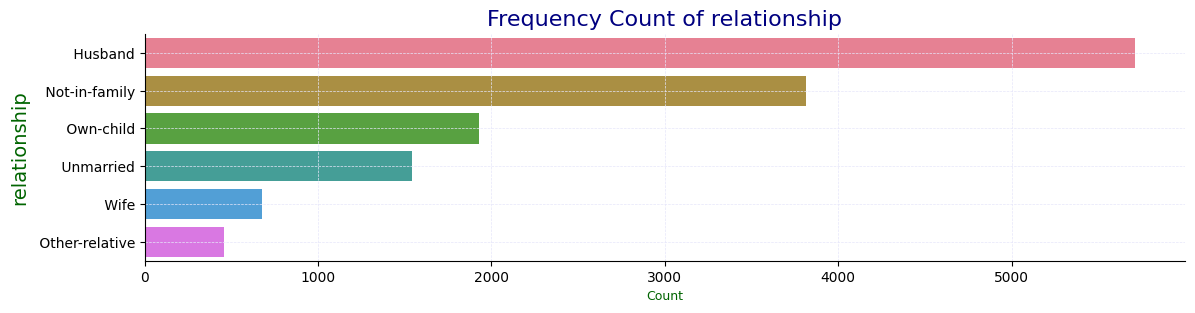

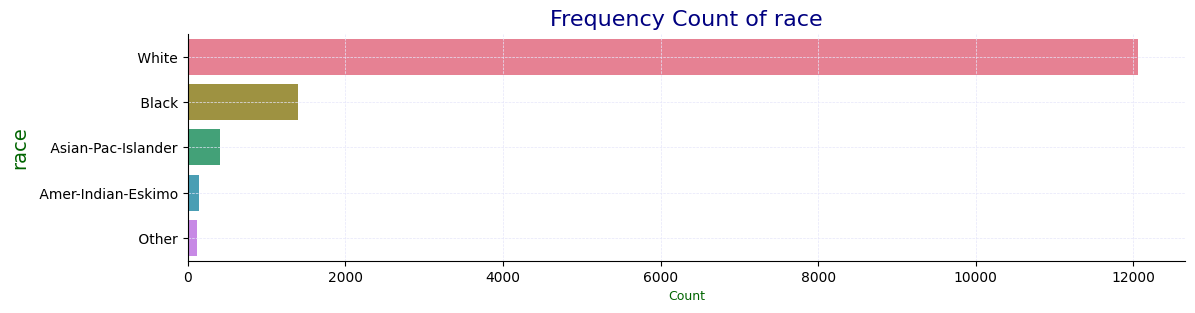

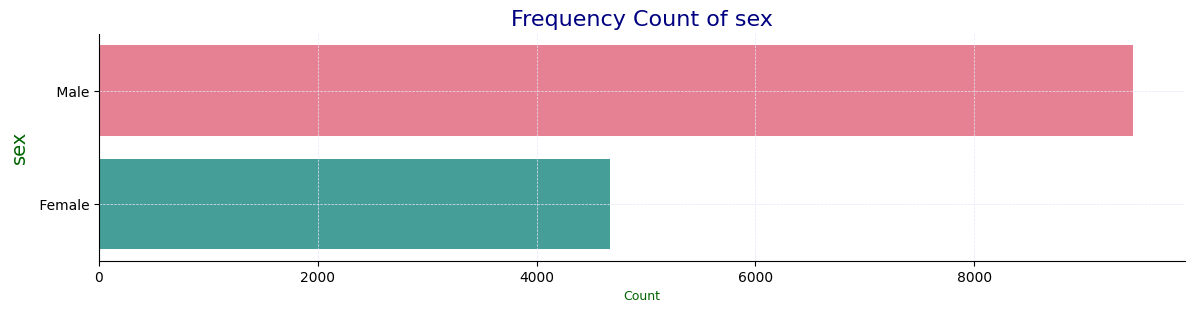

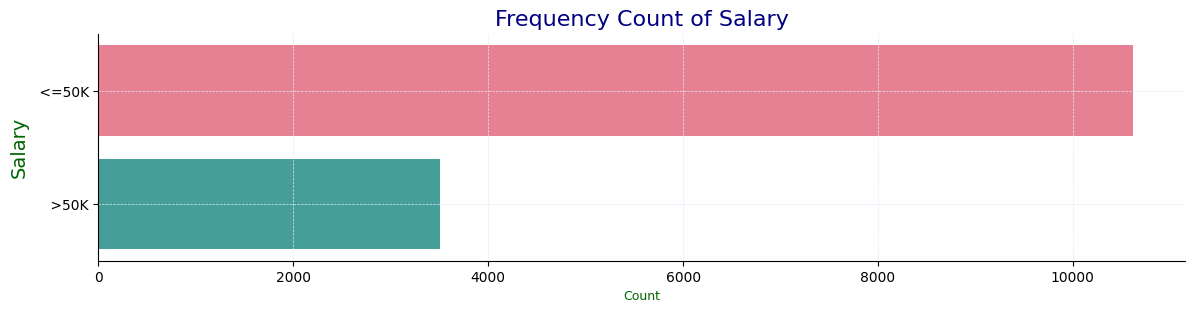

In [33]:
# Let us plot the frequency of each labels in categorical columns

for col in categorical_data:    
    if col != 'native':
        order_index = data[col].value_counts().sort_values(ascending = False).index
        sns.catplot(data = data, y = col, kind = 'count',order = order_index, aspect = 4, height = 3, palette = 'husl')    
        plt.title(f'Frequency Count of {col}', fontsize=16, color='navy') 
        plt.xlabel('Count', fontsize=9, color='darkgreen')  
        plt.ylabel(col, fontsize=14, color='darkgreen')  
        plt.grid(color='lavender', linestyle='--', linewidth=0.5)  
        plt.show()
         

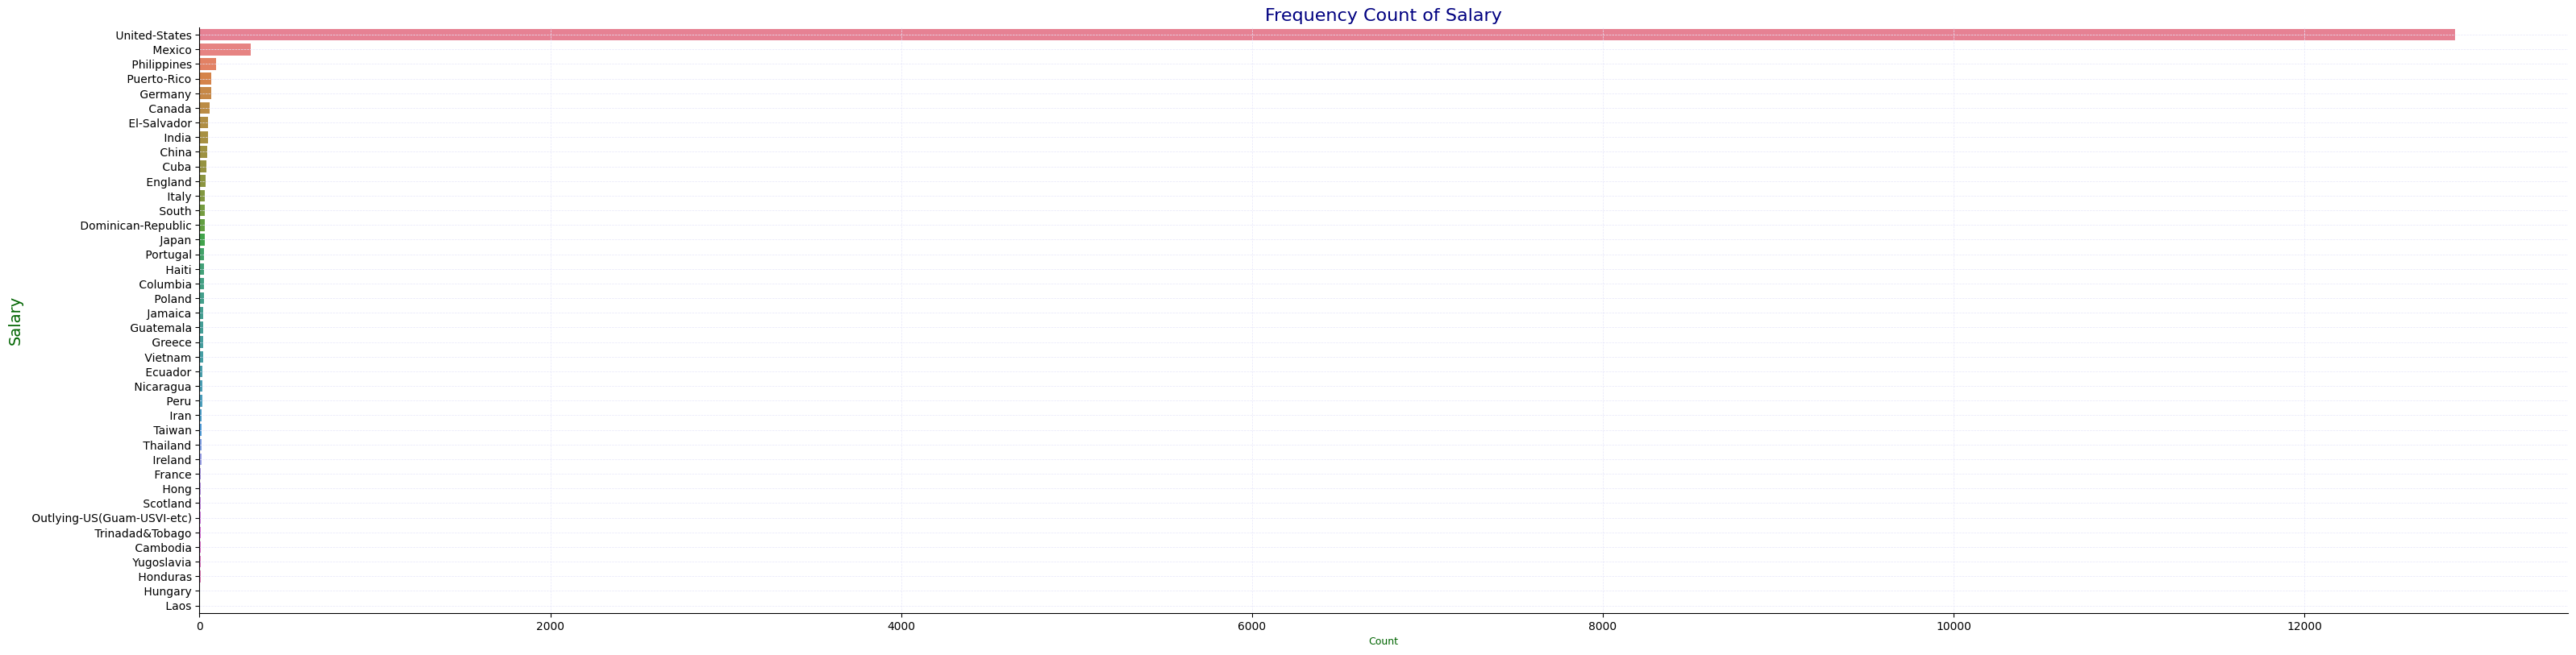

In [31]:
# frequency count of country i.e. native column

order_index = data['native'].value_counts().sort_values(ascending = False).index
sns.catplot(data = data, y = 'native', kind = 'count', order = order_index, aspect = 4, height = 8, palette = 'husl')    
plt.title(f'Frequency Count of {col}', fontsize=16, color='navy') 
plt.xlabel('Count', fontsize=9, color='darkgreen')  
plt.ylabel(col, fontsize=14, color='darkgreen')  
plt.grid(color='lavender', linestyle='--', linewidth=0.5)  

### Bivariate Plot

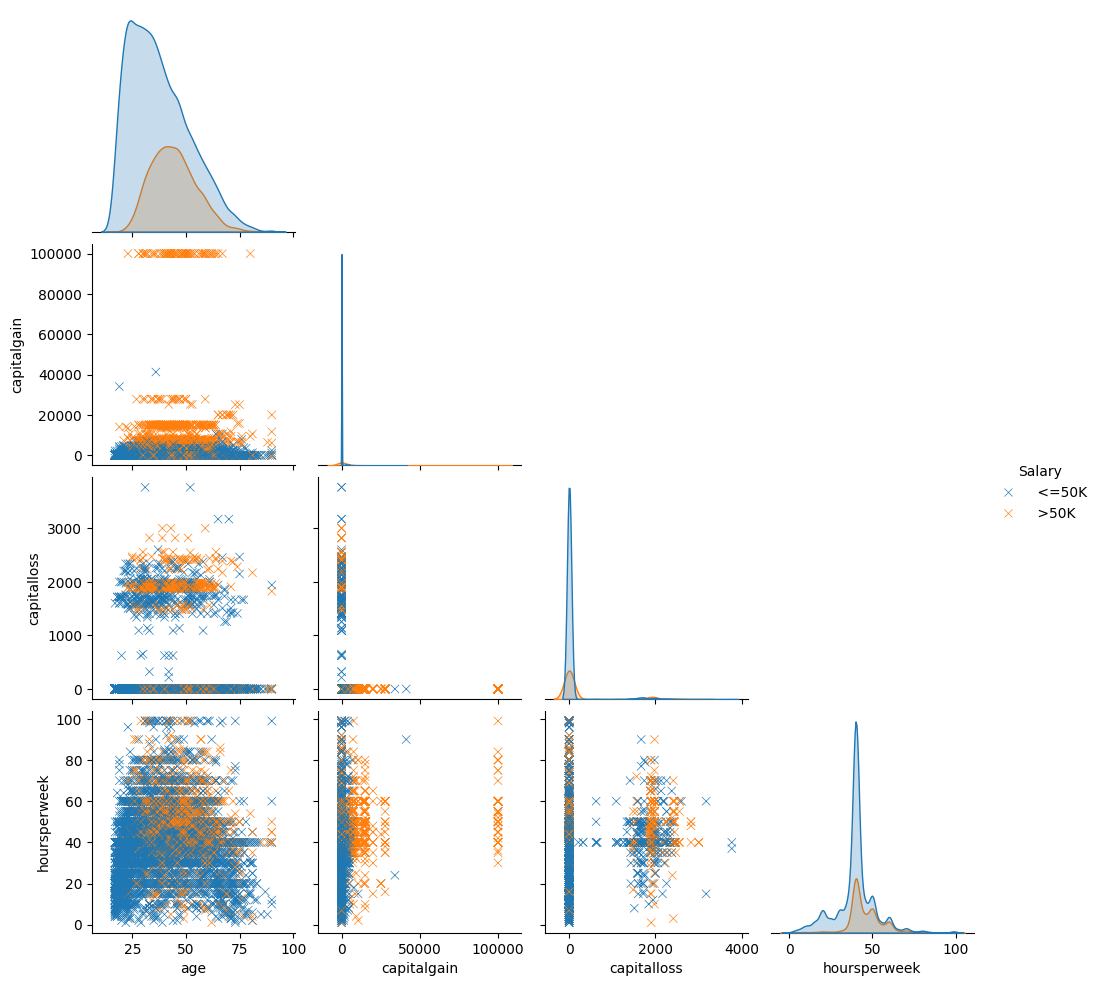

In [35]:
# let us plot scatter plot for numerical data

sns.pairplot(data, hue = 'Salary', markers = 'x', corner = True) 

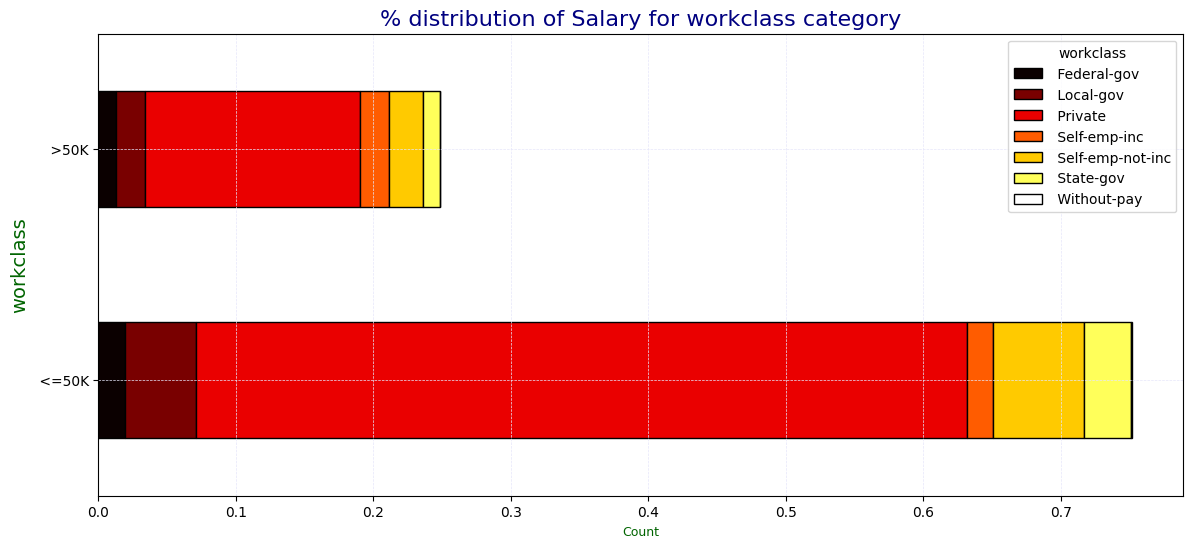

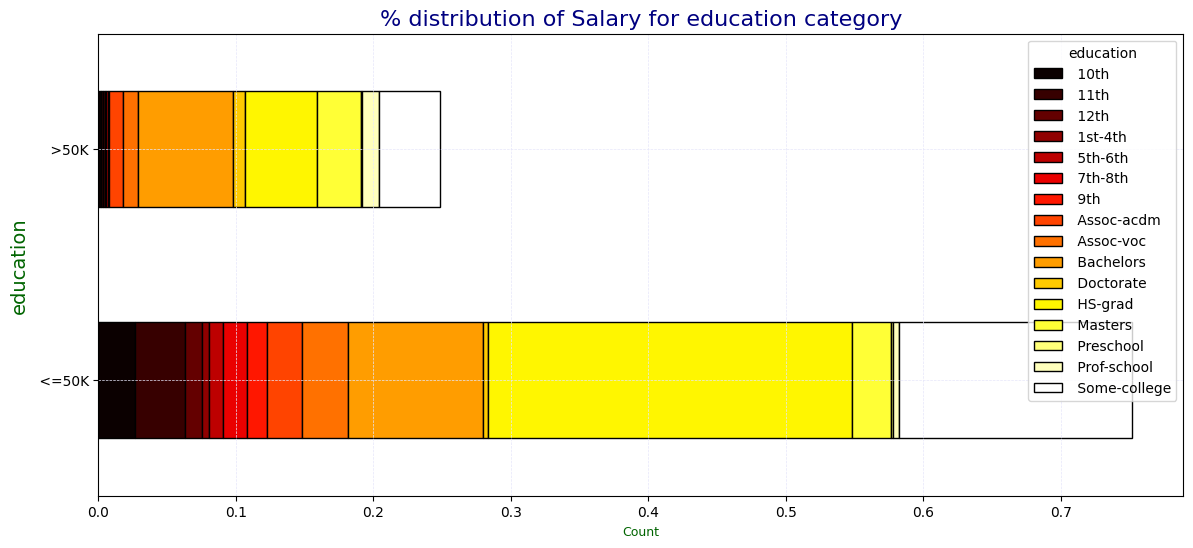

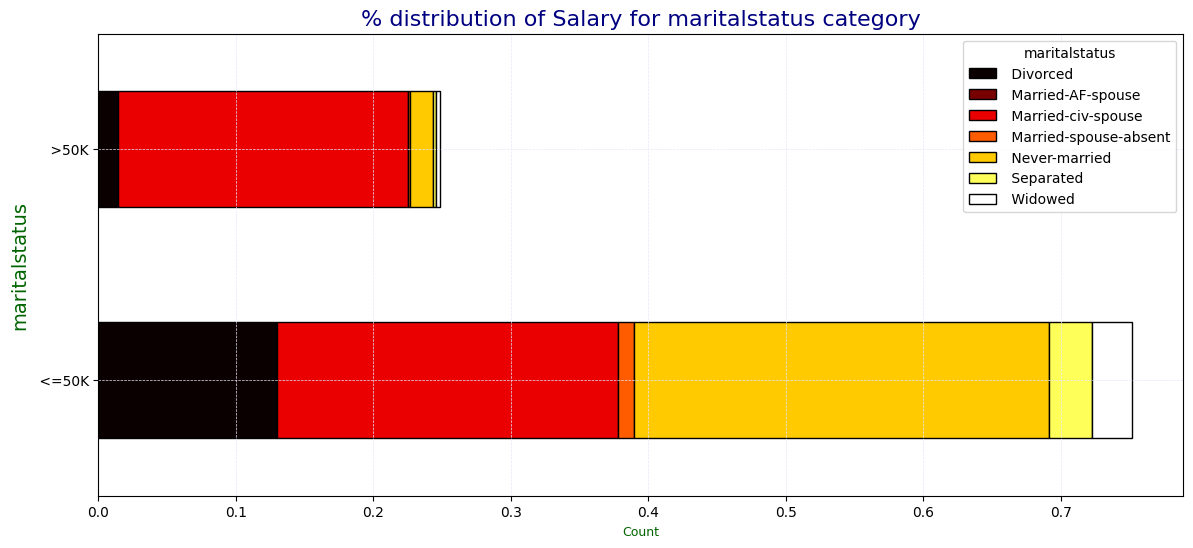

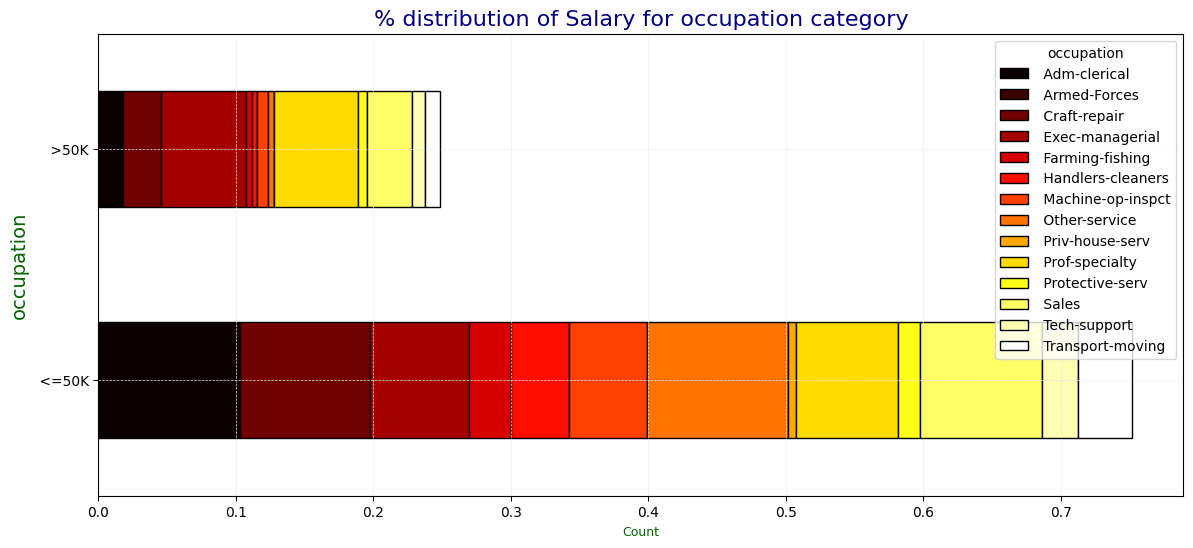

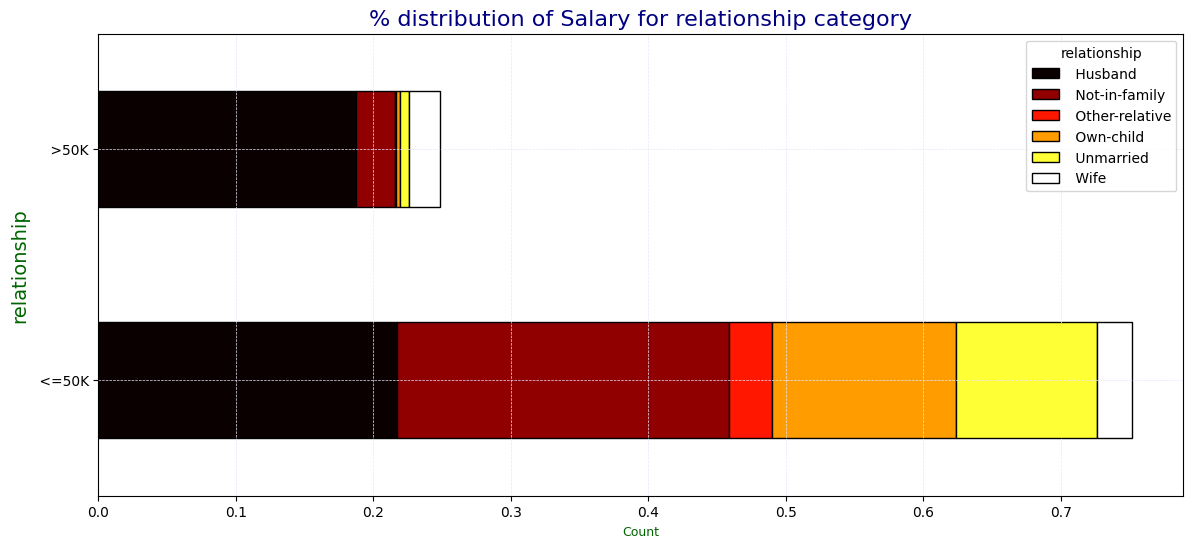

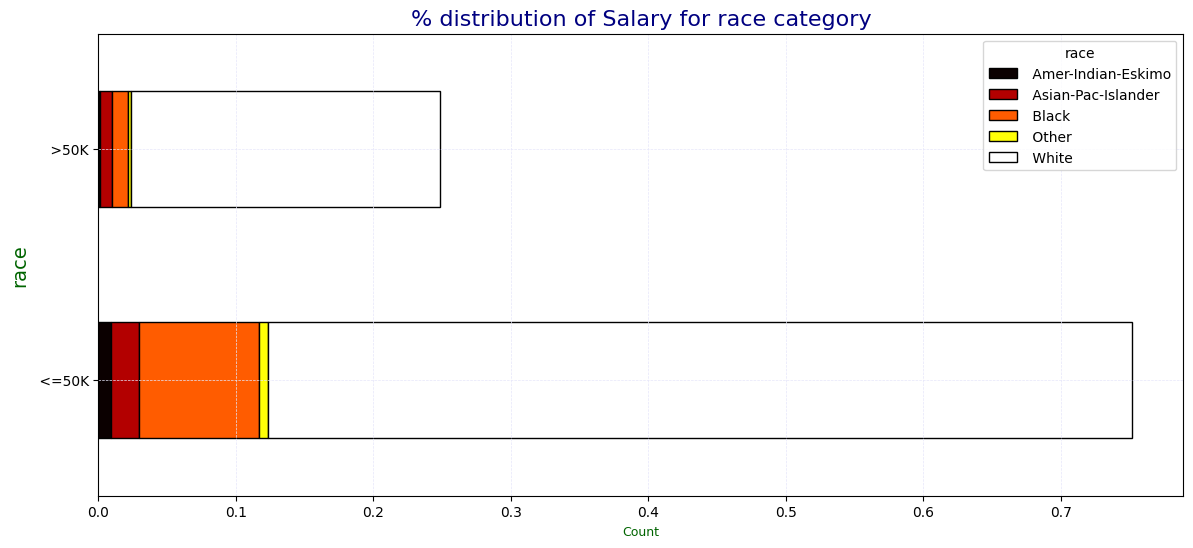

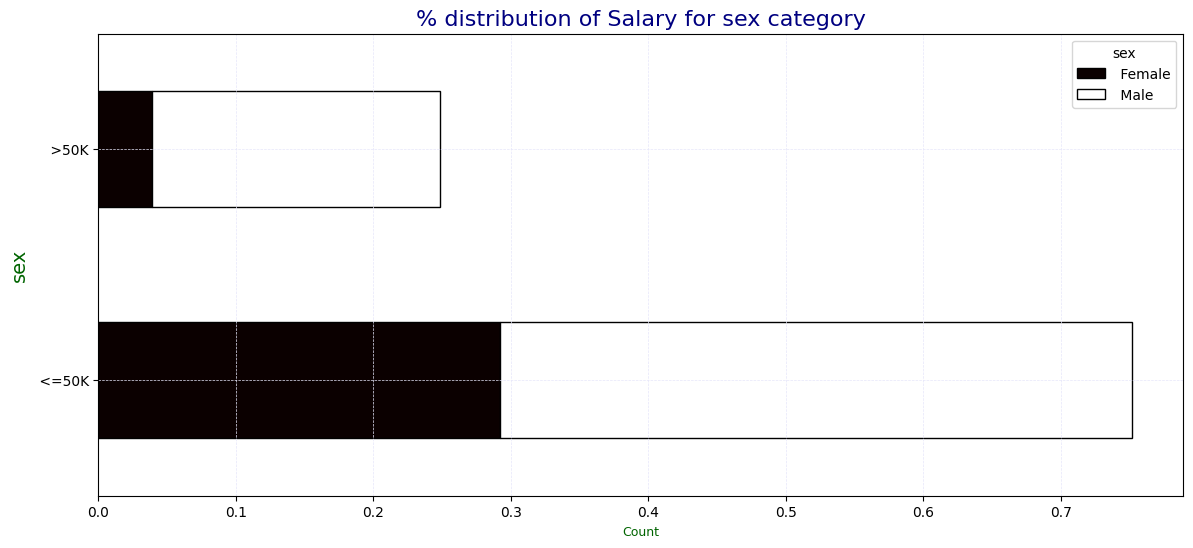

In [37]:
for col in categorical_data:
    if col not in ['Salary', 'native']:
        cross = pd.crosstab(index = data['Salary'], columns = data[col], normalize = True)
        cross.plot.barh(stacked = True, cmap = 'hot', figsize = (14, 6), edgecolor = 'black')
        plt.title(f"% distribution of Salary for {col} category", fontsize=16, color='navy')
        plt.xlabel('Count', fontsize=9, color='darkgreen')  
        plt.ylabel(col, fontsize=14, color='darkgreen')  
        plt.grid(color='lavender', linestyle='--', linewidth=0.5)  
        plt.show()

## Step 3: Data Pre-processing

### Outliers Removal

In [38]:
# Let us see count of unique values in each numerical columns

count = data['age'].value_counts()
print(count.index)
print(count.values)

Index([33, 35, 38, 31, 36, 34, 30, 37, 41, 23, 32, 28, 39, 29, 42, 40, 27, 47,
       24, 22, 46, 45, 44, 26, 43, 25, 48, 21, 51, 49, 20, 50, 19, 52, 53, 18,
       54, 55, 56, 58, 57, 59, 17, 61, 60, 62, 64, 63, 65, 66, 67, 68, 72, 69,
       71, 73, 70, 74, 75, 77, 76, 81, 80, 90, 78, 79, 83, 82, 85, 88, 89, 87,
       84],
      dtype='int64', name='age')
[417 415 401 393 393 378 377 375 371 371 369 364 362 357 353 352 351 346
 342 337 335 333 322 313 304 303 285 276 252 247 247 242 236 233 230 213
 185 181 180 168 168 154 146 130 121 114 110  93  80  70  69  46  43  36
  36  33  32  21  19  19  17  14  13  11   7   5   4   3   2   2   1   1
   1]


In [39]:
# replace outliers with mean

mean_age = int(data['age'].mean())
for value in age_outliers:
    if value in data.index:
        data.loc[value, 'age'] = mean_age

{'whiskers': [<matplotlib.lines.Line2D at 0x26fa7e9c4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x26fa6ba04a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26fa7e9e2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x26fa6ba28a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26fa6ba35f0>],
 'means': []}

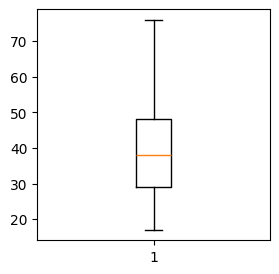

In [40]:
# Let us check bocplot of age column
plt.figure(figsize = (3, 3))
plt.boxplot(data['age'])

In [41]:
# Let us check value counts of capitalgain column

count = data['capitalgain'].value_counts()
print(count.index)
print(count.values)

Index([    0, 15024,  7688,  7298, 99999,  3103,  5013,  5178,  4386,  3325,
       ...
        7262,  2414, 41310,  2062,  9562,  2329,  3273,  2346, 34095,  2036],
      dtype='int64', name='capitalgain', length=110)
[12881   161   120   110    80    52    47    46    35    28    26    26
    24    22    21    15    15    14    14    12    12    12    12    11
    10    10    10    10    10    10     9     9     9     9     8     8
     8     8     7     7     7     7     7     7     7     6     6     5
     5     5     5     5     4     4     4     4     4     4     4     3
     3     3     3     3     3     3     3     3     3     3     3     3
     2     2     2     2     2     2     2     2     2     2     2     2
     2     2     2     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1]


In [42]:
# Let us replace outliers with mean capitalgain

median_capitalgain = int(data['capitalgain'].median())

for value in capitalGain_outliers:
    if value in data.index:
        data.loc[value, 'capitalgain'] = median_capitalgain

In [43]:
count = data['capitalloss'].value_counts()
print(count.index)
print(count.values)

Index([   0, 1902, 1977, 1887, 2415, 1590, 1485, 1876, 1741, 1740, 1564, 1672,
       1848, 2258, 1980, 1719, 1408, 2001, 2002, 1669, 2339, 2057, 1579, 1628,
       1974, 2444, 2205, 2051, 1504, 1721, 1602, 1726, 1668,  625, 2179, 1762,
       2559, 1573, 2377, 2824, 1092, 2231, 1340, 2042, 2472, 1429, 2129, 3004,
       1380, 2238, 1411, 2174, 3770, 1944, 1510, 2392, 2246, 1617, 1138, 1258,
        323, 3175,  653,  213, 2163, 2467, 2149, 1844, 1735, 1594, 1825, 2282,
       1421, 1870, 1911, 2547, 2603, 2457, 1651],
      dtype='int64', name='capitalloss')
[13420    98    84    72    23    21    20    20    19    16    16    15
    15    14    13    13    13    11    11    11    10     9     9     9
     9     8     8     8     7     6     6     5     5     5     5     5
     5     5     4     4     4     4     4     3     3     3     3     3
     3     2     2     2     2     2     2     2     2     2     2     2
     2     2     1     1     1     1     1     1     1     1     1    

In [44]:
# Let us replace outliers with mean capitalloss

median_capitalloss = int(data['capitalgain'].median())

for value in capitalLoss_outliers:
    if value in data.index:
        data.loc[value, 'capitalloss'] = median_capitalloss

In [45]:
# Let us check value couunts for hoursperweek column

count =data['hoursperweek'].value_counts()
print(count.index)
print(count.values)

Index([40, 50, 45, 60, 35, 20, 30, 55, 48, 25, 38, 15, 70, 32, 42, 65, 36, 10,
       44, 37, 24, 43, 16, 80, 52, 12, 28,  8, 18, 46, 99, 56, 75, 72, 47, 84,
       39, 33, 41,  5,  4, 34, 54,  6, 21, 22, 23, 17,  7, 90, 53, 14,  3, 27,
       49, 58,  2, 26, 31, 64, 51, 29,  9, 66, 11, 63, 78, 19, 62,  1, 68, 85,
       13, 96, 77, 98, 88, 61, 74, 67, 59, 86, 57, 92, 73, 76, 79, 89, 69],
      dtype='int64', name='hoursperweek')
[6417 1312  831  662  575  500  455  342  238  233  225  165  142  132
  111  107  106  103   92   91   86   73   71   68   64   59   51   50
   49   47   45   43   36   35   33   25   25   22   22   22   20   20
   20   19   18   17   14   13   13   13   12   11   11   11   10   10
    9    9    7    7    7    7    7    6    6    5    5    5    5    5
    4    4    4    4    3    3    2    2    2    2    2    2    2    2
    1    1    1    1    1]


In [46]:
# Let us per winsorization technqiue to remove outlier in houseperweek

from scipy.stats.mstats import winsorize

data['hoursperweek'] = winsorize(data['hoursperweek'], (0.2, 0.2))

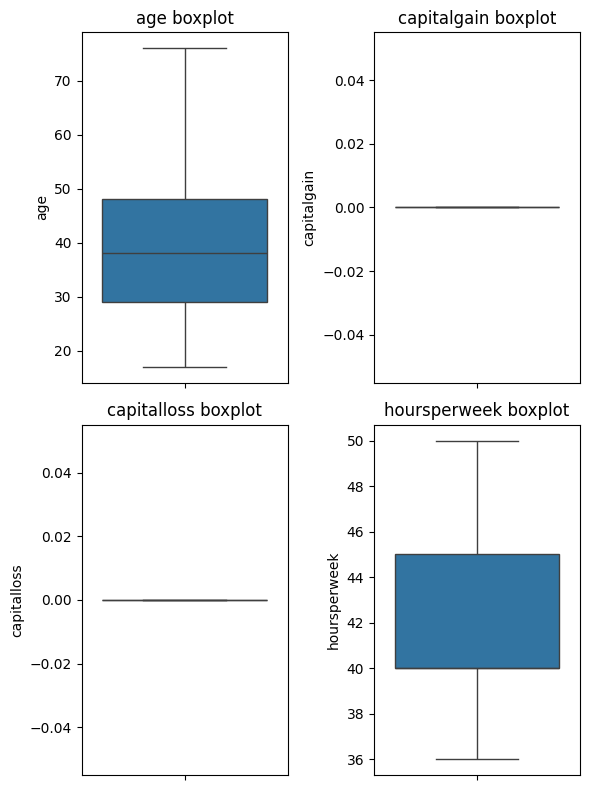

In [49]:
# Now,let us check boxplot plot of all numerical columns

plt.figure(figsize = (6, 8))
for i, col in enumerate(numerical_data, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[col])
    plt.title(f'{col} boxplot')
    
plt.tight_layout() 

### Encoding

In [50]:
# Now, let us encode the categorical columns

from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
for col in data.columns[data.dtypes == 'object']:
  data[col] = encode.fit_transform(data[col])            

In [51]:
data.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,4,6,3,2,1,0,0,40,37,0
1,38,2,11,2,4,0,4,1,0,0,50,37,0
2,28,1,7,2,10,0,4,1,0,0,40,37,1
3,44,2,15,2,6,0,2,1,0,0,40,37,1
4,34,2,0,4,7,1,4,1,0,0,36,37,0


### Feature Selection

In [52]:
# Let us initialize input and output variables

x = data.drop('Salary', axis = 1)
y = data['Salary']

In [53]:
# Let us see the best features that influence Salary

from sklearn.feature_selection import SelectKBest, chi2 

# we will select top 5 best feature based on chisquare score
kbest = SelectKBest(score_func=chi2, k = 3)
kbest.fit_transform(x, y)

array([[25,  3, 40],
       [38,  0, 50],
       [28,  0, 40],
       ...,
       [38,  0, 50],
       [44,  3, 40],
       [35,  0, 50]], dtype=int64)

In [54]:
scores = kbest.scores_
score_df = pd.DataFrame(list(zip(scores, x.columns)), columns = ['Score', 'Features']).sort_values(by = 'Score', ascending = False)

In [55]:
score_df

,Score,Features
0,3131.013397,age
5,1645.011486,relationship
10,547.390338,hoursperweek
3,437.836081,maritalstatus
7,210.310853,sex
2,176.699253,education
4,82.081422,occupation
6,14.854877,race
11,3.801021,native
1,0.824695,workclass


In [56]:
# Let us select top 6 features for further analysis

for index, row in score_df.iterrows():
    if row['Score'] < 250 or pd.isna(row['Score']):
        x = x.drop(row['Features'], axis = 1)    

In [58]:
x.head()

,age,maritalstatus,relationship,hoursperweek
0,25,4,3,40
1,38,2,0,50
2,28,2,0,40
3,44,2,0,40
4,34,4,1,36


### Standardization

In [59]:
# Now, let us perform standardization

from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
scaled_data = pd.DataFrame(scaled.fit_transform(x), columns = x.columns)

In [60]:
scaled_data.head()

,age,maritalstatus,relationship,hoursperweek
0,-1.067498,0.925446,0.989324,-0.360288
1,-0.069596,-0.386868,-0.888332,1.657896
2,-0.837213,-0.386868,-0.888332,-0.360288
3,0.390974,-0.386868,-0.888332,-0.360288
4,-0.376643,0.925446,-0.262447,-1.167561


## Model Building

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(scaled_data, y)

LogisticRegression()

In [62]:
test_data = pd.read_csv('SalaryData_Test.csv')

test_data.drop('educationno', axis = 1, inplace = True)

for col in test_data.columns[test_data.dtypes == 'object']:
  test_data[col] = encode.fit_transform(test_data[col])

x_test = test_data.drop('Salary', axis = 1)
y_test = test_data['Salary']


for index, row in score_df.iterrows():
    if row['Score'] < 250 or pd.isna(row['Score']):
        x_test = x_test.drop(row['Features'], axis = 1)   
        
scaled_test_data = pd.DataFrame(scaled.transform(x_test), columns = x_test.columns)     


In [63]:
scaled_test_data.head()

,age,maritalstatus,relationship,hoursperweek
0,-1.067498,0.925446,0.989324,-0.360288
1,-0.069596,-0.386868,-0.888332,1.657896
2,-0.837213,-0.386868,-0.888332,-0.360288
3,0.390974,-0.386868,-0.888332,-0.360288
4,-0.376643,0.925446,-0.262447,-2.378472


In [64]:
test_pred = model.predict(scaled_test_data)

### Model Performance

In [66]:
from sklearn.metrics import accuracy_score, classification_report
report = classification_report(y_test, test_pred)
print(report)      

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     11360
           1       0.50      0.28      0.36      3700

    accuracy                           0.75     15060
   macro avg       0.65      0.60      0.61     15060
weighted avg       0.72      0.75      0.73     15060



### Model Validation

In [71]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits= 10, random_state = 42, shuffle=True)
scores = cross_val_score(model, scaled_test_data, y_test, cv=skf)
print("Model score after cross validation is, ", np.round(scores, 2))

Model score after cross validation is,  [0.75 0.76 0.75 0.75 0.74 0.75 0.76 0.75 0.76 0.76]
